## __Lab 2: Naive Bayes Classifier__

__Lebohang Mosia : 2320396__ 

__Lusanda Mdhlalose : 2332720__ 

__Thapelo Duma : 2493083__

In [1]:
# !pip install nltk

In [2]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import numpy as np
import os
import pandas as pd
from collections import defaultdict, Counter
import os
import matplotlib.pyplot as plt
import seaborn as sns

# nltk.download('punkt')
# nltk.download('punkt_tab')


In [3]:
def clean_and_split_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
    
    text = re.sub(r'[^\w\s]', '', text.lower())
    
    words = text.split()
    
    return words

# __Question 3__

In [4]:
def tokenize_words(words):
    return word_tokenize(' '.join(words))


# __Question 4__

In [5]:
def extract_ngrams(tokens, n):
    n_grams = list(ngrams(tokens, n))
    return n_grams


# Question 5

In [6]:
def read_pages(file_name, num_pages=None):
    words = clean_and_split_text(file_name)
    num_total_pages = len(words) // words_per_page + (1 if len(words) % words_per_page > 0 else 0)
    
    if num_pages is None or num_pages > num_total_pages:
        num_pages = num_total_pages
    
    pages = []
    for i in range(num_pages):
        start_index = i * words_per_page
        end_index = start_index + words_per_page
        page_words = words[start_index:end_index]
        tokens = tokenize_words(page_words)
        bigrams = extract_ngrams(tokens, N)
        pages.append(bigrams)
    
    return pages

def split_data(pages):
    total_pages = len(pages)
    np.random.shuffle(pages)  # Shuffle pages to ensure random splits

    train_end = int(total_pages * training_page_percentage)
    validation_end = train_end + int(total_pages * val_page_percentage)
    
    train_pages = pages[:train_end]
    validation_pages = pages[train_end:validation_end]
    test_pages = pages[validation_end:]

    return train_pages, validation_pages, test_pages

def prepare_data(books_dir, book_names, num_pages_per_book=None):
    all_train_pages = []
    all_validation_pages = []
    all_test_pages = []

    for idx, book_name in enumerate(book_names, start=1):
        file_path = os.path.join(books_dir, book_name + ".txt")
        pages = read_pages(file_path, num_pages_per_book)

        train_pages, validation_pages, test_pages = split_data(pages)

        # Append data with corresponding targets
        all_train_pages.extend([(page, idx) for page in train_pages])
        all_validation_pages.extend([(page, idx) for page in validation_pages])
        all_test_pages.extend([(page, idx) for page in test_pages])

    return all_train_pages, all_validation_pages, all_test_pages

def create_dataframes(train_pages, validation_pages, test_pages, book_names):
    def create_dataframe(pages):
        rows = []
        for page, book_idx in pages:
            for ngram in page:
                rows.append({
                    'title': book_names[book_idx - 1],
                    'ngrams': ngram,
                    'page_number': pages.index((page, book_idx)) + 1,  # Adjust index as needed
                    'label': book_idx  # Label as the book index
                })
        return pd.DataFrame(rows)

    train_df = create_dataframe(train_pages)
    validation_df = create_dataframe(validation_pages)
    test_df = create_dataframe(test_pages)

    return train_df, validation_df, test_df


books_dir = "harry_potter(1)"
book_names = ["HP1", "HP2", "HP3", "HP4", "HP5", "HP6", "HP7"]
num_books = len(book_names)
N = 2 # n_grams
training_page_percentage = 0.7
val_page_percentage = 0.2
testing_page_percentage = 0.1
words_per_page = 220
num_pages_per_book = 10


# Prepare data
train_pages, validation_pages, test_pages = prepare_data(books_dir, book_names, num_pages_per_book)

# Create dataframes
train_df, validation_df, test_df = create_dataframes(train_pages, validation_pages, test_pages, book_names)


# train_df.to_csv('train_data.csv', index=False)
# validation_df.to_csv('validation_data.csv', index=False)
# test_df.to_csv('test_data.csv', index=False)


In [7]:
print("Training DataFrame Sample:")
train_df.head(20)


Training DataFrame Sample:


,title,ngrams,page_number,label
0,HP1,"(the, potters)",1,1
1,HP1,"(potters, were)",1,1
2,HP1,"(were, involved)",1,1
3,HP1,"(involved, there)",1,1
4,HP1,"(there, was)",1,1
5,HP1,"(was, no)",1,1
6,HP1,"(no, reason)",1,1
7,HP1,"(reason, for)",1,1
8,HP1,"(for, them)",1,1
9,HP1,"(them, to)",1,1


In [8]:
train_df.tail(20)

,title,ngrams,page_number,label
10713,HP7,"(voldemort, indicating)",49,7
10714,HP7,"(indicating, the)",49,7
10715,HP7,"(the, seat)",49,7
10716,HP7,"(seat, on)",49,7
10717,HP7,"(on, his)",49,7
10718,HP7,"(his, immediate)",49,7
10719,HP7,"(immediate, right)",49,7
10720,HP7,"(right, yaxley)",49,7
10721,HP7,"(yaxley, beside)",49,7
10722,HP7,"(beside, dolohov)",49,7


In [9]:
print("Validation DataFrame Sample:")
validation_df.head(20)

Validation DataFrame Sample:


,title,ngrams,page_number,label
0,HP1,"(together, mr)",1,1
1,HP1,"(mr, dursley)",1,1
2,HP1,"(dursley, was)",1,1
3,HP1,"(was, enraged)",1,1
4,HP1,"(enraged, to)",1,1
5,HP1,"(to, see)",1,1
6,HP1,"(see, that)",1,1
7,HP1,"(that, a)",1,1
8,HP1,"(a, couple)",1,1
9,HP1,"(couple, of)",1,1


In [10]:
validation_df.tail(20)


,title,ngrams,page_number,label
3046,HP7,"(now, i)",14,7
3047,HP7,"(i, shall)",14,7
3048,HP7,"(shall, need)",14,7
3049,HP7,"(need, for)",14,7
3050,HP7,"(for, instance)",14,7
3051,HP7,"(instance, to)",14,7
3052,HP7,"(to, borrow)",14,7
3053,HP7,"(borrow, a)",14,7
3054,HP7,"(a, wand)",14,7
3055,HP7,"(wand, from)",14,7


In [11]:
print("Test DataFrame Sample:")
test_df.head(20)

Test DataFrame Sample:


,title,ngrams,page_number,label
0,HP1,"(group, of)",1,1
1,HP1,"(of, them)",1,1
2,HP1,"(them, next)",1,1
3,HP1,"(next, to)",1,1
4,HP1,"(to, the)",1,1
5,HP1,"(the, bakers)",1,1
6,HP1,"(bakers, he)",1,1
7,HP1,"(he, eyed)",1,1
8,HP1,"(eyed, them)",1,1
9,HP1,"(them, angrily)",1,1


In [12]:
test_df.tail(20)

,title,ngrams,page_number,label
1513,HP7,"(missed, by)",7,7
1514,HP7,"(by, voldemort)",7,7
1515,HP7,"(voldemort, whose)",7,7
1516,HP7,"(whose, eyes)",7,7
1517,HP7,"(eyes, widened)",7,7
1518,HP7,"(widened, maliciously)",7,7
1519,HP7,"(maliciously, give)",7,7
1520,HP7,"(give, you)",7,7
1521,HP7,"(you, my)",7,7
1522,HP7,"(my, wand)",7,7


# __Question 6__

In [13]:
# # Save the dataframes to CSV
# train_df.to_csv('train_data.csv', index=False)
# validation_df.to_csv('validation_data.csv', index=False)
# test_df.to_csv('test_data.csv', index=False)

# # Get the full paths to the CSV files
# train_csv_path = os.path.abspath('train_data.csv')
# validation_csv_path = os.path.abspath('validation_data.csv')
# test_csv_path = os.path.abspath('test_data.csv')

# # Print the file paths
# print(f"Train CSV Path: {train_csv_path}")
# print(f"Validation CSV Path: {validation_csv_path}")
# print(f"Test CSV Path: {test_csv_path}")

In [14]:
# train_file_path = r'C:\Users\leboh\train_data2.csv'
# validation_file_path = r'C:\Users\leboh\validation_data2.csv'
# test_file_path = r'C:\Users\leboh\test_data2.csv'

# print(os.path.exists(train_file_path))  # This should print True if the file exists
# print(os.path.exists(validation_file_path))
# print(os.path.exists(test_file_path))


In [15]:
# # Read the CSV files
# train_df = pd.read_csv(r'C:\Users\leboh\train_data2.csv')
# validation_df = pd.read_csv(r'C:\Users\leboh\validation_data2.csv')
# test_df = pd.read_csv(r'C:\Users\leboh\test_data2.csv')

# Convert ngrams from tuples stored as strings back to tuples
# train_df['ngrams'] = train_df['ngrams'].apply(eval)
# validation_df['ngrams'] = validation_df['ngrams'].apply(eval)
# test_df['ngrams'] = test_df['ngrams'].apply(eval)

# Function to build frequency tables from DataFrame
def build_frequency_tables(df):
    word_freq = defaultdict(lambda: defaultdict(int))
    vocab = set()

    for index, row in df.iterrows():
        ngram = row['ngrams']
        label = row['label']
        for word in ngram:
            vocab.add(word)
            word_freq[label][word] += 1
    
    return word_freq, vocab

# Calculate probabilities with Laplace smoothing
def calculate_probabilities(word_freq, vocab, laplace=1):
    total_pages = sum(sum(word_freq[label].values()) for label in word_freq)
    prior_probs = {label: sum(word_freq[label].values()) / total_pages for label in word_freq}
    
    word_probs = defaultdict(dict)
    
    for label in word_freq:
        total_words_in_label = sum(word_freq[label].values())
        for word in vocab:
            word_probs[label][word] = (word_freq[label][word] + laplace) / (total_words_in_label + laplace * len(vocab))
    
    return prior_probs, word_probs

# Predict the book label
def predict_label(ngrams, prior_probs, word_probs, vocab):
    label_scores = {}
    
    for label in prior_probs:
        label_scores[label] = np.log(prior_probs[label])  # Start with the prior probability
        
        for word in ngrams:
            if word in vocab:
                label_scores[label] += np.log(word_probs[label].get(word, 1 / (len(vocab) + 1)))  # Add log probabilities with Laplace smoothing
    
    return max(label_scores, key=label_scores.get)

# Calculate accuracy for a given DataFrame
def calculate_accuracy(df, prior_probs, word_probs, vocab):
    correct = 0
    total = 0
    for index, row in df.iterrows():
        ngrams = row['ngrams']
        true_label = row['label']
        predicted_label = predict_label(ngrams, prior_probs, word_probs, vocab)
        if predicted_label == true_label:
            correct += 1
        total += 1
    return correct / total

# Train the Naive Bayes model
# word_freq_train, vocab_train = build_frequency_tables(train_df)
# prior_probs_train, word_probs_train = calculate_probabilities(word_freq_train, vocab_train)

# # Calculate accuracies
# train_accuracy = calculate_accuracy(train_df, prior_probs_train, word_probs_train, vocab_train)
# validation_accuracy = calculate_accuracy(validation_df, prior_probs_train, word_probs_train, vocab_train)
# test_accuracy = calculate_accuracy(test_df, prior_probs_train, word_probs_train, vocab_train)

# # Print results
# print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
# print(f"Validation Accuracy: {validation_accuracy * 100:.2f}%")
# print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


# Exploration of the Naive Bayes Classifier

Number of pages were 6 and words per page were 220

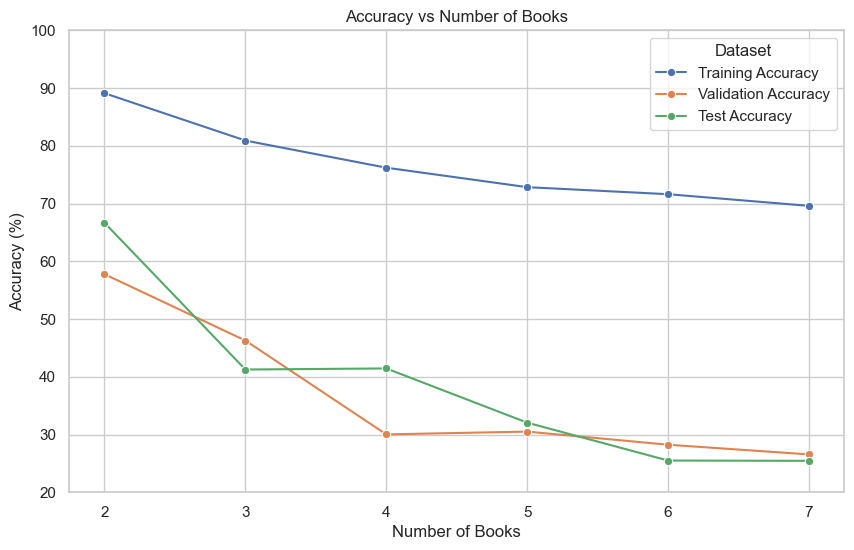

In [16]:

data = {
    'Number of Books': [7, 6, 5, 4, 3, 2],
    'Training Accuracy': [69.59, 71.61, 72.83, 76.20, 80.90, 89.10],
    'Validation Accuracy': [26.55, 28.23, 30.50, 30.02, 46.27, 57.76],
    'Test Accuracy': [25.44, 25.49, 32.05, 41.44, 41.25, 66.67]
}

df = pd.DataFrame(data)

df_melted = pd.melt(df, id_vars=['Number of Books'], 
                    value_vars=['Training Accuracy', 'Validation Accuracy', 'Test Accuracy'],
                    var_name='Set', value_name='Accuracy')


sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x='Number of Books', y='Accuracy', hue='Set', data=df_melted, marker="o")

plt.title('Accuracy vs Number of Books')
plt.ylim(20, 100)
plt.ylabel('Accuracy (%)')
plt.xlabel('Number of Books')
plt.legend(title='Dataset')
plt.show()


Note that the number of words per page were 220 and HP books were 7.

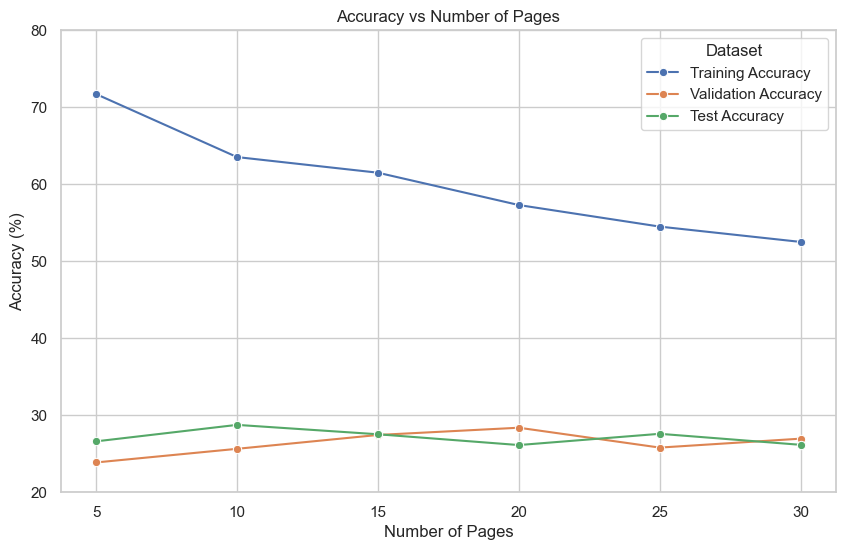

In [17]:
data_pages = {
    'Number of Pages': [5, 10, 15, 20, 25, 30],
    'Training Accuracy': [71.71, 63.53, 61.50, 57.30, 54.50, 52.51],
    'Validation Accuracy': [23.87, 25.64, 27.44, 28.38, 25.80, 26.96],
    'Test Accuracy': [26.61, 28.75, 27.53, 26.13, 27.59, 26.16]
}

df_pages = pd.DataFrame(data_pages)


df_pages_melted = pd.melt(df_pages, id_vars=['Number of Pages'], 
                          value_vars=['Training Accuracy', 'Validation Accuracy', 'Test Accuracy'],
                          var_name='Set', value_name='Accuracy')

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x='Number of Pages', y='Accuracy', hue='Set', data=df_pages_melted, marker="o")


plt.title('Accuracy vs Number of Pages')
plt.ylim(20, 80)
plt.ylabel('Accuracy (%)')
plt.xlabel('Number of Pages')
plt.legend(title='Dataset')
plt.show()


Note that the number of pages used were 10 as they seemed to have the highest accuracy for test data on the last plot, the number of HP books is 7.

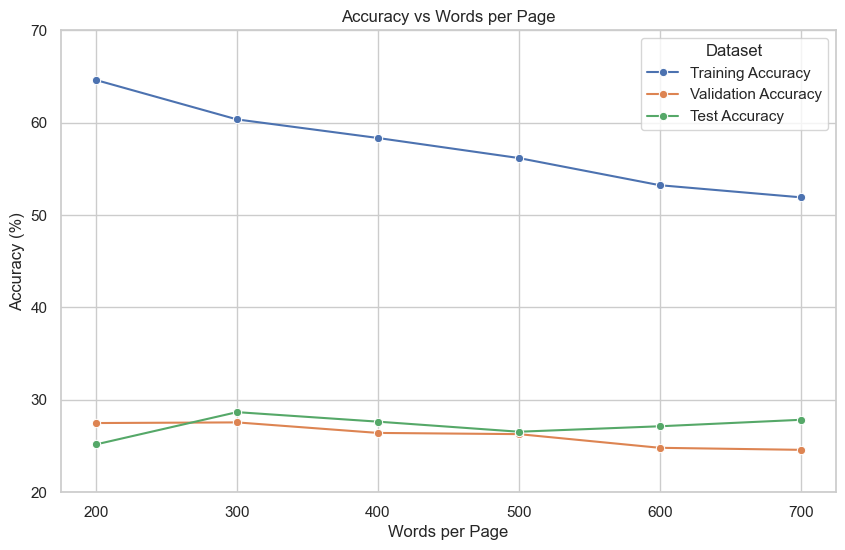

In [18]:
data_words_per_page = {
    'Words per Page': [200, 300, 400, 500, 600, 700],
    'Training Accuracy': [64.61, 60.35, 58.34, 56.17, 53.23, 51.92],
    'Validation Accuracy': [27.49, 27.56, 26.42, 26.29, 24.81, 24.59],
    'Test Accuracy': [25.18, 28.67, 27.64, 26.55, 27.14, 27.84]
}

df_words_per_page = pd.DataFrame(data_words_per_page)

df_words_melted = pd.melt(df_words_per_page, id_vars=['Words per Page'], 
                          value_vars=['Training Accuracy', 'Validation Accuracy', 'Test Accuracy'],
                          var_name='Set', value_name='Accuracy')

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x='Words per Page', y='Accuracy', hue='Set', data=df_words_melted, marker="o")

plt.title('Accuracy vs Words per Page')
plt.ylim(20, 70)
plt.ylabel('Accuracy (%)')
plt.xlabel('Words per Page')
plt.legend(title='Dataset')
plt.show()


Let use the best hyperparameters:

- 2 Books 
- 700 words per page
- 6 pages 

In [19]:
books_dir = "harry_potter(1)"
book_names = ["HP1", "HP2"]
num_books = len(book_names)
N = 2 # n_grams
training_page_percentage = 0.7
val_page_percentage = 0.2
testing_page_percentage = 0.1
words_per_page = 700
num_pages_per_book = 6


# Prepare data
train_pages, validation_pages, test_pages = prepare_data(books_dir, book_names, num_pages_per_book)

# Create dataframes
train_df, validation_df, test_df = create_dataframes(train_pages, validation_pages, test_pages, book_names)

# Train the Naive Bayes model
word_freq_train, vocab_train = build_frequency_tables(train_df)
prior_probs_train, word_probs_train = calculate_probabilities(word_freq_train, vocab_train)

# Calculate accuracies
train_accuracy = calculate_accuracy(train_df, prior_probs_train, word_probs_train, vocab_train)
validation_accuracy = calculate_accuracy(validation_df, prior_probs_train, word_probs_train, vocab_train)
test_accuracy = calculate_accuracy(test_df, prior_probs_train, word_probs_train, vocab_train)

# Print results
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Validation Accuracy: {validation_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Training Accuracy: 85.21%
Validation Accuracy: 53.00%
Test Accuracy: 61.80%
